In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost
from xgboost import XGBRegressor
import lightgbm
from lightgbm import LGBMRegressor
!pip install CatBoost
import catboost
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sub = pd.read_csv("/content/SampleSubmission (1).csv")
test = pd.read_csv("/content/Test (1).csv")
train = pd.read_csv("/content/Train (1).csv")

# Preprocessing

In [ ]:
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-23.73_28.77_2019_1,-23.73,28.77,2019,1,0.000167,0.713172,0.000102,0.223929,24.939440,...,5566.222019,54826.032616,4606.209995,19.115282,0.353778,24.951948,49.053953,-89.638032,17.988874,86.051700
1,ID_-23.73_28.77_2019_2,-23.73,28.77,2019,2,-0.000155,0.812910,-0.000137,0.080281,16.624162,...,3711.511365,68491.753342,3034.461661,12.218664,0.244987,4.708856,42.586683,-89.904314,22.773246,88.875670
2,ID_-23.73_28.77_2019_3,-23.73,28.77,2019,3,-0.000065,0.860306,-0.000062,0.161050,-13.237244,...,2136.385189,78967.739548,1433.482587,6.062737,0.245102,76.060628,34.737544,-83.595254,17.437300,91.723114
3,ID_-23.73_28.77_2019_4,-23.73,28.77,2019,4,0.000152,0.422284,0.000087,0.046504,-13.534653,...,3841.853018,64592.806769,2878.512917,6.388233,0.210904,75.912368,60.294490,-71.896728,11.977818,92.883870
4,ID_-23.73_28.77_2019_5,-23.73,28.77,2019,5,0.000024,1.004578,0.000028,0.214246,-13.475718,...,1295.688171,86804.025391,1094.665344,9.206252,0.261103,-13.346079,50.194493,-77.462082,24.374270,94.878330


In [ ]:
train.columns

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

In [ ]:
train = train.drop(['ID_LAT_LON_YEAR_WEEK'], axis=1)
test = test.drop(['ID_LAT_LON_YEAR_WEEK'], axis=1)

In [ ]:
col_list = train.columns

for col in col_list.drop('emission'):
  mean = train[col].mean()
  train[col].fillna(mean, inplace=True)
  test[col].fillna(mean, inplace=True)

In [ ]:
X = train.drop(['emission'], axis=1)
y = train['emission']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, shuffle=True)

ValueError: ignored

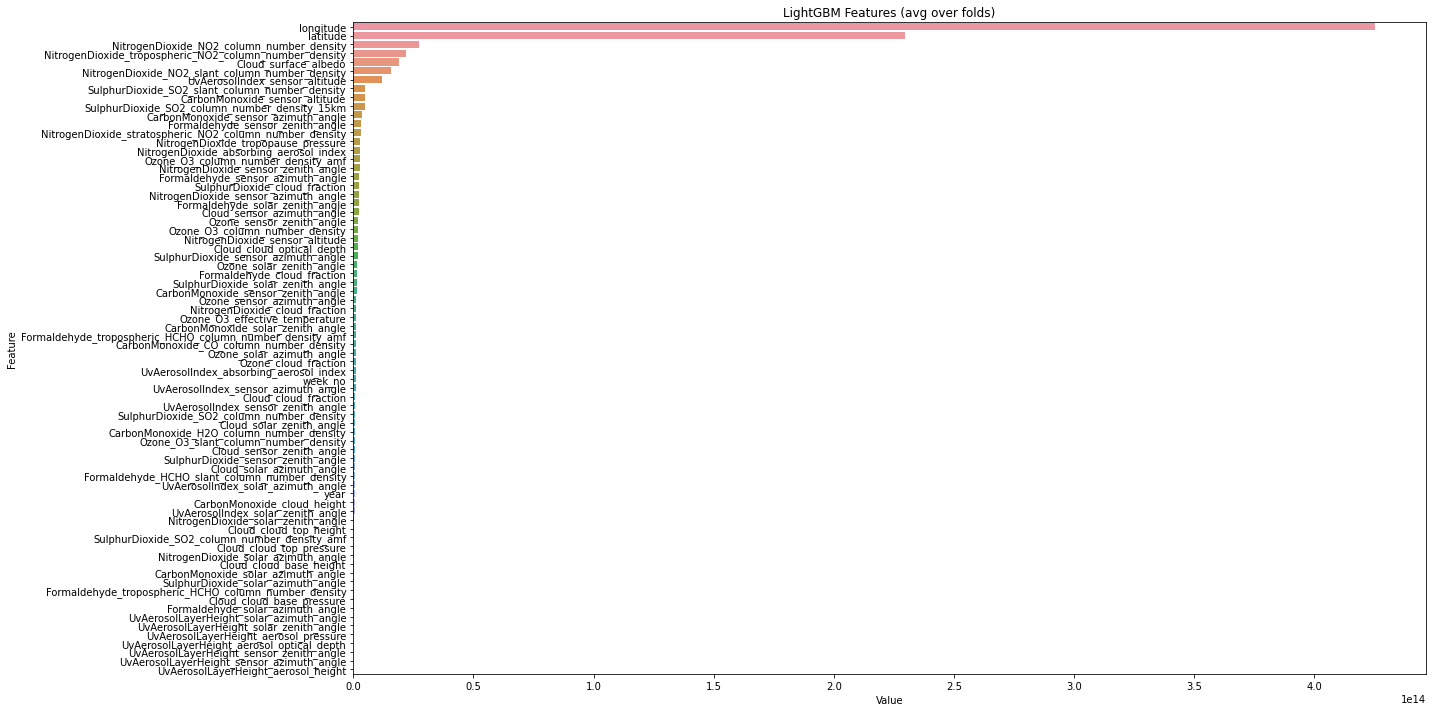

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [ ]:
feature_imp.sort_values('Value', ascending=False).head(20)

,Value,Feature
73,4.251258e+14,longitude
72,2.294897e+14,latitude
71,2.744077e+13,NitrogenDioxide_NO2_column_number_density
70,2.208750e+13,NitrogenDioxide_tropospheric_NO2_column_number...
69,1.917127e+13,Cloud_surface_albedo
68,1.579397e+13,NitrogenDioxide_NO2_slant_column_number_density
67,1.201523e+13,UvAerosolIndex_sensor_altitude
66,4.985855e+12,SulphurDioxide_SO2_slant_column_number_density
65,4.940734e+12,CarbonMonoxide_sensor_altitude
64,4.808362e+12,SulphurDioxide_SO2_column_number_density_15km


In [ ]:
model = CatBoostRegressor(random_state=2023)
model.fit(scaled_X, y_train)

Learning rate set to 0.077229
0:	learn: 50181.8133004	total: 41.7ms	remaining: 41.6s
1:	learn: 46890.5988947	total: 79.5ms	remaining: 39.7s
2:	learn: 43827.4314120	total: 117ms	remaining: 38.9s
3:	learn: 40897.3888258	total: 152ms	remaining: 37.9s
4:	learn: 38289.0726064	total: 191ms	remaining: 37.9s
5:	learn: 35866.2764383	total: 245ms	remaining: 40.5s
6:	learn: 33602.7456071	total: 291ms	remaining: 41.3s
7:	learn: 31627.4041671	total: 320ms	remaining: 39.6s
8:	learn: 29869.7100018	total: 338ms	remaining: 37.2s
9:	learn: 28135.0641798	total: 357ms	remaining: 35.3s
10:	learn: 26560.5658506	total: 382ms	remaining: 34.3s
11:	learn: 25138.3243585	total: 418ms	remaining: 34.4s
12:	learn: 23882.4743426	total: 437ms	remaining: 33.2s
13:	learn: 22764.2488705	total: 488ms	remaining: 34.4s
14:	learn: 22152.8254856	total: 534ms	remaining: 35.1s
15:	learn: 21203.2840388	total: 551ms	remaining: 33.9s
16:	learn: 20830.8493552	total: 568ms	remaining: 32.9s
17:	learn: 20342.5706102	total: 621ms	remai

In [ ]:
sub['emission'] = model.predict(scaled_test)
sub.to_csv("catboost_scaled.csv", index=False)

In [ ]:
metrics.mean_squared_error(y_test, pred)

86823230.86384982

In [ ]:
from sklearn.model_selection import GridSearchCV

model = CatBoostRegressor()
parameters = {'depth' : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100]
              }

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)

0:	learn: 49615.2226609	total: 252ms	remaining: 25s
1:	learn: 45655.6593837	total: 496ms	remaining: 24.3s
2:	learn: 42066.6376810	total: 751ms	remaining: 24.3s
3:	learn: 38851.9897865	total: 1s	remaining: 24.1s
4:	learn: 35884.7612045	total: 1.25s	remaining: 23.7s
5:	learn: 33131.0253176	total: 1.54s	remaining: 24.1s
6:	learn: 30717.3743901	total: 2.02s	remaining: 26.9s
7:	learn: 28425.6462011	total: 2.51s	remaining: 28.9s
8:	learn: 26545.6455680	total: 3.03s	remaining: 30.6s
9:	learn: 24821.0866220	total: 3.47s	remaining: 31.3s
10:	learn: 23190.8892717	total: 3.95s	remaining: 32s
11:	learn: 21337.2284836	total: 4.44s	remaining: 32.5s
12:	learn: 20101.7946564	total: 4.7s	remaining: 31.4s
13:	learn: 18964.1909891	total: 4.96s	remaining: 30.5s
14:	learn: 17972.6156652	total: 5.21s	remaining: 29.5s
15:	learn: 16646.6490786	total: 5.46s	remaining: 28.7s
16:	learn: 15474.4842103	total: 5.71s	remaining: 27.9s
17:	learn: 14479.1498256	total: 5.98s	remaining: 27.2s
18:	learn: 13756.0019076	tot

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f3a99a53640>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [ ]:
grid.best_params_

{'depth': 10, 'iterations': 100, 'learning_rate': 0.1}

In [ ]:
model = CatBoostRegressor(depth=10, iterations=100, learning_rate=0.1, random_state=2023)
model.fit(X_train[['longitude', 'latitude'_density']], y_train)
metrics.mean_squared_error(y_test, pred)

0:	learn: 48898.4843030	total: 24ms	remaining: 2.38s
1:	learn: 44602.1269025	total: 57.4ms	remaining: 2.81s
2:	learn: 40829.2278344	total: 80.1ms	remaining: 2.59s
3:	learn: 37578.5947571	total: 102ms	remaining: 2.45s
4:	learn: 34603.7170466	total: 124ms	remaining: 2.35s
5:	learn: 32000.8942579	total: 145ms	remaining: 2.28s
6:	learn: 29498.5630025	total: 161ms	remaining: 2.13s
7:	learn: 27242.6503411	total: 183ms	remaining: 2.1s
8:	learn: 25283.0695203	total: 193ms	remaining: 1.95s
9:	learn: 23722.2541414	total: 214ms	remaining: 1.93s
10:	learn: 21810.9209421	total: 240ms	remaining: 1.94s
11:	learn: 20149.3517641	total: 264ms	remaining: 1.94s
12:	learn: 18938.7469045	total: 290ms	remaining: 1.94s
13:	learn: 17601.6673162	total: 312ms	remaining: 1.92s
14:	learn: 16602.9961860	total: 335ms	remaining: 1.9s
15:	learn: 15752.6733940	total: 357ms	remaining: 1.87s
16:	learn: 14866.5099326	total: 378ms	remaining: 1.84s
17:	learn: 14195.7119484	total: 400ms	remaining: 1.82s
18:	learn: 13359.0863

86823230.86384982

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
cbr = CatBoostRegressor(depth=10, iterations=100, learning_rate=0.1, random_state=2023)
 
# Making the final model using voting classifier
final_model = VotingRegressor(
    estimators=[('CTB', cbr)])
 
# training all the model on the train dataset
final_model.fit(X[['longitude', 'latitude']], y)

0:	learn: 47824.0260719	total: 89.2ms	remaining: 8.83s
1:	learn: 43629.8913142	total: 153ms	remaining: 7.5s
2:	learn: 39913.0711520	total: 218ms	remaining: 7.06s
3:	learn: 36657.1163569	total: 284ms	remaining: 6.82s
4:	learn: 33524.1942464	total: 370ms	remaining: 7.03s
5:	learn: 30943.5534818	total: 431ms	remaining: 6.75s
6:	learn: 28507.2759630	total: 473ms	remaining: 6.28s
7:	learn: 26422.7055364	total: 559ms	remaining: 6.43s
8:	learn: 24469.3777909	total: 673ms	remaining: 6.8s
9:	learn: 22810.1077689	total: 774ms	remaining: 6.96s
10:	learn: 21282.4208815	total: 834ms	remaining: 6.75s
11:	learn: 19864.9066366	total: 917ms	remaining: 6.72s
12:	learn: 18658.9401135	total: 977ms	remaining: 6.54s
13:	learn: 17634.7592252	total: 1.05s	remaining: 6.45s
14:	learn: 16746.2964736	total: 1.13s	remaining: 6.38s
15:	learn: 15949.4150287	total: 1.2s	remaining: 6.3s
16:	learn: 15340.9559665	total: 1.3s	remaining: 6.33s
17:	learn: 14574.7235418	total: 1.38s	remaining: 6.29s
18:	learn: 13672.2201966

VotingRegressor(estimators=[('CTB',
                             <catboost.core.CatBoostRegressor object at 0x7f3a953a8790>)])

In [ ]:
sub['emission'] = final_model.predict(test[['longitude', 'latitude']])


In [ ]:
sub.to_csv("bse.csv", index=False)